<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#K-NN(K-Nearest-Neighbor)" data-toc-modified-id="K-NN(K-Nearest-Neighbor)-14.3"><span class="toc-item-num">14.3&nbsp;&nbsp;</span>K-NN(K-Nearest Neighbor)</a></span><ul class="toc-item"><li><span><a href="#K-NN-알고리즘의-원리" data-toc-modified-id="K-NN-알고리즘의-원리-14.3.1"><span class="toc-item-num">14.3.1&nbsp;&nbsp;</span>K-NN 알고리즘의 원리</a></span></li><li><span><a href="#K의-선택" data-toc-modified-id="K의-선택-14.3.2"><span class="toc-item-num">14.3.2&nbsp;&nbsp;</span>K의 선택</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#앞서-분할한-credit-데이터의-train데이터로-K-NN-모델을-만들어-보자" data-toc-modified-id="앞서-분할한-credit-데이터의-train데이터로-K-NN-모델을-만들어-보자-14.3.2.0.1"><span class="toc-item-num">14.3.2.0.1&nbsp;&nbsp;</span>앞서 분할한 credit 데이터의 train데이터로 K-NN 모델을 만들어 보자</a></span></li></ul></li></ul></li><li><span><a href="#최적의-k찾기" data-toc-modified-id="최적의-k찾기-14.3.3"><span class="toc-item-num">14.3.3&nbsp;&nbsp;</span>최적의 k찾기</a></span></li><li><span><a href="#Cross-validation을-활용한-최적의-k찾기" data-toc-modified-id="Cross-validation을-활용한-최적의-k찾기-14.3.4"><span class="toc-item-num">14.3.4&nbsp;&nbsp;</span>Cross-validation을 활용한 최적의 k찾기</a></span></li></ul></li></ul></div>

-----------

## K-NN(K-Nearest Neighbor) 


### K-NN 알고리즘의 원리

- K-NN 알고리즘에서는 새로운 데이터의 클래스를 해당 데이터와 가장 가까운 k개 데이터들의 클래스(범주)로 결정한다. 

- 예를 들어 아래의 그림에서 '?'의 클래스를 구분하고자 할 때, k를 1로 설정할 경우는 사각형으로 분류할 수 있고 k를 3으로 설정할 경우는 삼각형으로 분류될 수 있다. 

- K-NN 알고리즘에서는 최근접 이웃 간의 거리를 계산할 때 유클리디안 거리, 맨하탄 거리, 민코우스키 거리 등을 사용할 수 있으며, 대표적으로 유클리디안 거리를 사용한다. 

###  K의 선택 
- K의 선택은 학습의 난이도와 데이터의 개수에 따라 결정될 수 있으며, 일반적으로는 훈련 데이터 개수의 제곱근으로 설정한다. 그리고 짝수로 했을 때, 인접객체의 범주가 동률일 경우가 나오므로 일반적으로 홀수로 설정함 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

credit = pd.read_csv("C:/adp/data/credit_final.csv")
X = credit[credit.columns.difference(['credit.rating'])]
y = credit['credit.rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y , random_state=321)
X_train.head()

,account.balance,age,apartment.type,bank.credits,credit.amount,credit.duration.months,credit.purpose,current.assets,dependents,employment.duration,foreign.worker,guarantor,installment.rate,marital.status,occupation,other.credits,previous.credit.payment.status,residence.duration,savings,telephone
75,2,24,2,1,2030,9,2,3,1,3,1,1,2,3,3,2,2,1,4,2
112,2,36,2,1,2366,12,4,3,1,3,1,1,3,1,4,2,3,3,3,2
327,3,46,2,2,1343,6,4,1,2,4,2,1,1,3,3,2,3,4,1,1
894,2,34,2,1,2064,24,2,2,1,1,1,1,3,1,4,2,3,2,1,2
437,3,24,2,1,935,6,3,1,1,2,1,1,3,1,3,2,3,2,1,1


##### 앞서 분할한 credit 데이터의 train데이터로 K-NN 모델을 만들어 보자 

In [2]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [3]:
clf =KNeighborsClassifier() #### k = 5 
clf.fit(X_train,y_train)

KNeighborsClassifier()

In [4]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [10]:
y_pred=clf.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix, plot_roc_curve, roc_auc_score
confusion_matrix(y_test,y_pred)

array([[ 22,  68],
       [ 40, 170]], dtype=int64)

C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


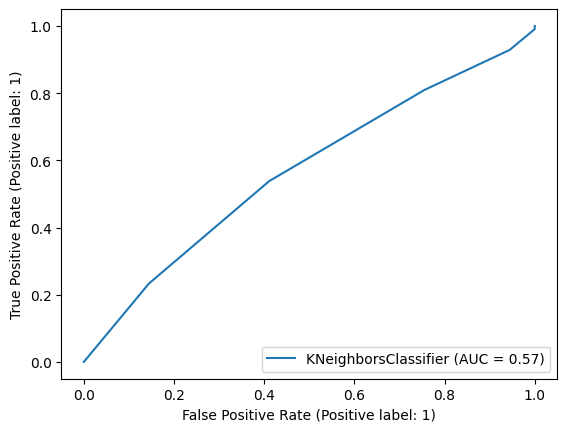

In [12]:
plot_roc_curve(clf, X_test,y_test)

In [13]:
roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])

0.5692592592592592

### 최적의 k찾기

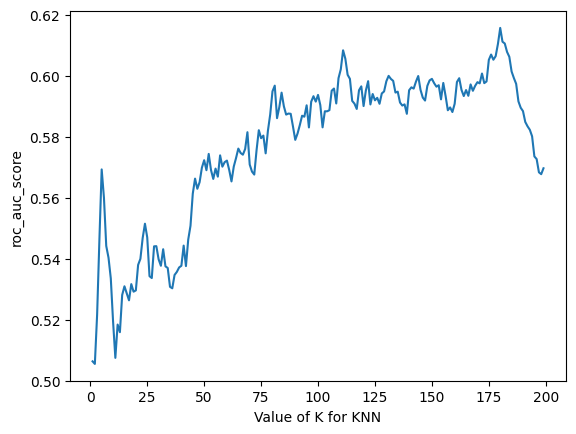

In [15]:
k_range = range(1,200)
k_scores= []

for k in k_range:
    knn=KNeighborsClassifier(k)
    knn.fit(X_train,y_train)
    scores=roc_auc_score(y_test,knn.predict_proba(X_test)[:,1])
    k_scores.append(scores.mean())
    
import matplotlib.pyplot as plt
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('roc_auc_score')
plt.show()

In [18]:
k_scores[:10]

[0.5063492063492063,
 0.5055026455026456,
 0.5216931216931218,
 0.5462433862433863,
 0.5692592592592592,
 0.5599206349206349,
 0.5441798941798942,
 0.5403174603174603,
 0.5335449735449735,
 0.5194179894179894]

In [15]:
print(max(k_scores))
print(k_scores.index(max(k_scores)))

0.6156349206349208
179


### 14.3.4 Cross-validation을 활용한 최적의 k찾기

In [19]:
from sklearn.model_selection import cross_val_score

In [21]:
k_range = range(1,100)
k_scores= []

for k in k_range:
    knn = KNeighborsClassifier(k)
    scores = cross_val_score(knn, X, y, cv=10, scoring="accuracy")
    k_scores.append(scores.mean())

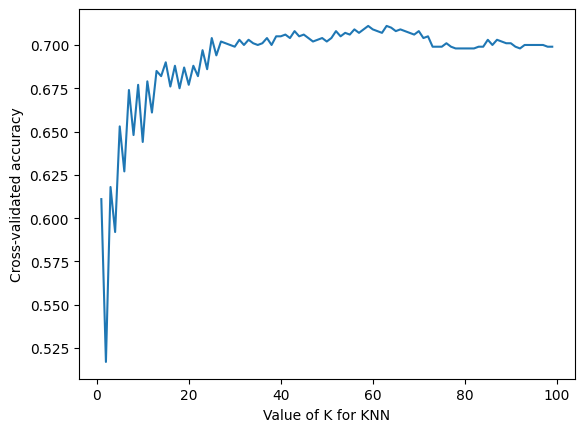

In [22]:
import matplotlib.pyplot as plt
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.show()

In [24]:
k_scores[:10]

[0.611,
 0.517,
 0.618,
 0.592,
 0.6529999999999999,
 0.627,
 0.6739999999999999,
 0.648,
 0.6769999999999999,
 0.644]